In [3]:
import pandas as pd
import numpy as np


df = pd.read_csv("regression_output.csv")



df["Model_AI_Impact"] = df["Predicted_AI_Impact"].clip(0, 100)


# job resilience score

df["Job_Resilience_Score"] = 100 - df["Model_AI_Impact"]


bins = [0, 40, 70, 100]
labels = ["Low Resilience", "Medium Resilience", "High Resilience"]

df["Resilience_Level"] = pd.cut(
    df["Job_Resilience_Score"],
    bins=bins,
    labels=labels,
    include_lowest=True
)



out = df[
    [
        "Job titiles",
        "Domain",
        "AI Impact",              
        "Model_AI_Impact",        
        "Job_Resilience_Score",   
        "Resilience_Level"        
    ]
]

out.to_csv("job_model_resilience_index.csv", index=False)



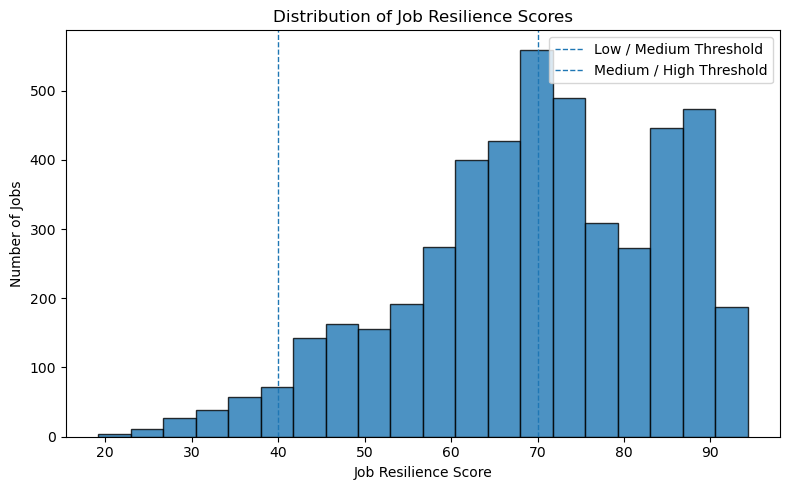

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.hist(
    df["Job_Resilience_Score"],
    bins=20,
    edgecolor="black",
    alpha=0.8
)

plt.xlabel("Job Resilience Score")
plt.ylabel("Number of Jobs")
plt.title("Distribution of Job Resilience Scores")

# Referans çizgileri (yorumlamayı çok güçlendirir)
plt.axvline(40, linestyle="--", linewidth=1, label="Low / Medium Threshold")
plt.axvline(70, linestyle="--", linewidth=1, label="Medium / High Threshold")

plt.legend()
plt.tight_layout()
plt.show()


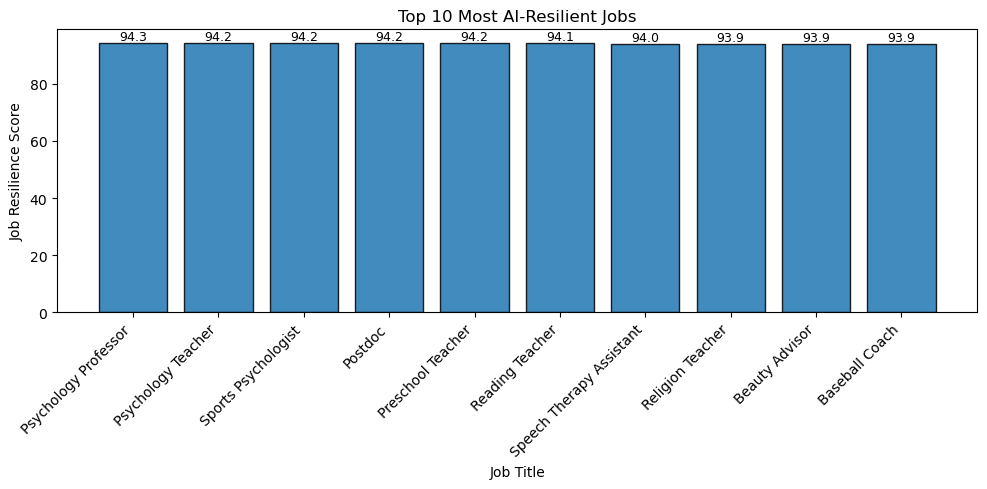

In [ ]:
# Top 10 en dayanıklı meslek
top10 = df.sort_values(
    "Job_Resilience_Score",
    ascending=False
).head(10)

plt.figure(figsize=(10, 5))

bars = plt.bar(
    top10["Job titiles"],
    top10["Job_Resilience_Score"],
    edgecolor="black",
    alpha=0.85
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Job Resilience Score")
plt.xlabel("Job Title")
plt.title("Top 10 Most AI-Resilient Jobs")


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()


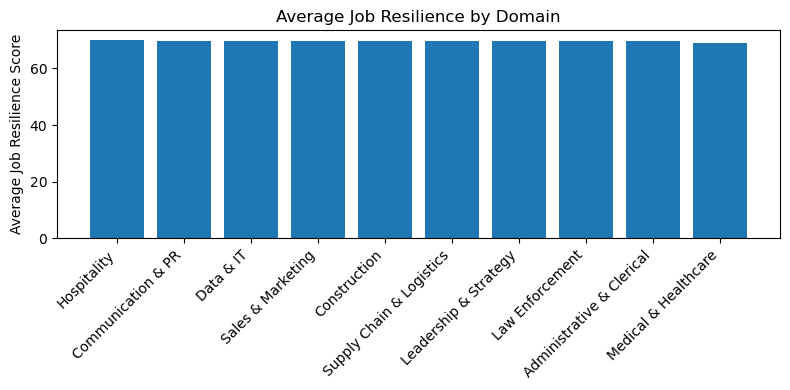

In [6]:
domain_res = df.groupby("Domain")["Job_Resilience_Score"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(domain_res.index, domain_res.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Job Resilience Score")
plt.title("Average Job Resilience by Domain")
plt.tight_layout()
plt.show()


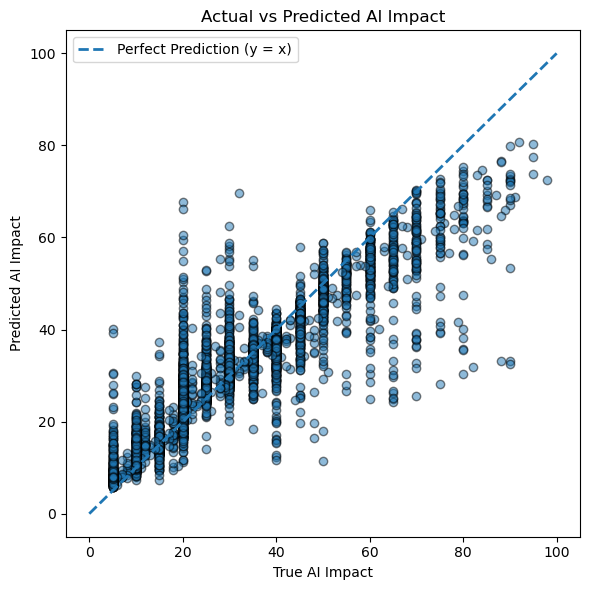

In [ ]:
plt.figure(figsize=(6, 6))

plt.scatter(
    df["AI Impact"],
    df["Model_AI_Impact"],
    alpha=0.5,
    edgecolor="black"
)


plt.plot(
    [0, 100],
    [0, 100],
    linestyle="--",
    linewidth=2,
    label="Perfect Prediction (y = x)"
)

plt.xlabel("True AI Impact")
plt.ylabel("Predicted AI Impact")
plt.title("Actual vs Predicted AI Impact")

plt.legend()
plt.tight_layout()
plt.show()
